In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier

### 2. Data Preprocessing

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.rename(columns={'v1': 'Spam', 'v2': 'Text'},inplace =True)
df.head()

,Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df = pd.get_dummies(df['Spam'], drop_first = True)
spam_df.head()

,spam
0,0
1,0
2,1
3,0
4,0


### 3. Making Pipeline

#### 3.1 Naive_Classifier

In [4]:
training_accuracy = dict()
testing_accuracy = dict()

In [5]:
tfid = TfidfVectorizer()
nmf_dr = NMF(n_components = 25)
naive_classifier = GaussianNB()
pipeline = make_pipeline(tfid, nmf_dr, naive_classifier)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], spam_df['spam'])

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nmf',
                 NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0,
                     max_iter=200, n_components=25, rando

In [8]:
pipeline.score(X_test, y_test)

0.7631012203876526

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))

[[907 308]
 [ 22 156]]


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1215
           1       0.34      0.88      0.49       178

    accuracy                           0.76      1393
   macro avg       0.66      0.81      0.67      1393
weighted avg       0.89      0.76      0.80      1393



In [12]:
training_accuracy['Naive Bayes'] = pipeline.score(X_train, y_train)
testing_accuracy['Naive Bayes'] = pipeline.score(X_test, y_test)

#### 3.2 Knn Classifier

In [13]:
tfid = TfidfVectorizer()
nmf_dr = NMF(n_components = 25)

train_accuracy = []
test_accuracy = []

for i in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_pipeline = make_pipeline(tfid, nmf_dr, knn_classifier)
    knn_pipeline.fit(X_train, y_train)
    train_accuracy.append(knn_pipeline.score(X_train, y_train))
    test_accuracy.append(knn_pipeline.score(X_test, y_test))
    

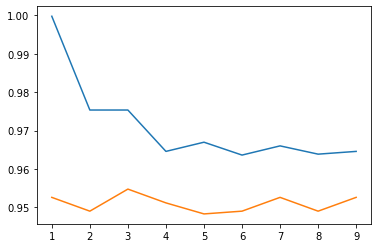

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1,10), train_accuracy)
plt.plot(range(1,10), test_accuracy)

In [16]:
tfid = TfidfVectorizer()
nmf_dr = NMF(n_components = 25)
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_pipeline = make_pipeline(tfid, nmf_dr, knn_classifier)
knn_pipeline.fit(X_train, y_train)
print('The training accuracy is: ',knn_pipeline.score(X_train, y_train))
print('The testing accuracy is: ',knn_pipeline.score(X_test, y_test))

The training accuracy is:  0.9641062455132807
The testing accuracy is:  0.9483129935391242


In [17]:
training_accuracy['Knn'] = knn_pipeline.score(X_train, y_train)
testing_accuracy['Knn'] = knn_pipeline.score(X_test, y_test)

#### 3.3 Support Vector Machine

In [18]:
from sklearn import svm

In [29]:
tfid = TfidfVectorizer()
nmf_dr = NMF(n_components = 25)
svm_classifier = svm.SVC(degree = 4)
svm_pipeline = make_pipeline(tfid, nmf_dr, svm_classifier)
svm_pipeline.fit(X_train, y_train)
print('The training accuracy is: ',svm_pipeline.score(X_train, y_train))
print('The testing accuracy is: ',svm_pipeline.score(X_test, y_test))

The training accuracy is:  0.9700885379277339
The testing accuracy is:  0.9619526202440776


In [31]:
training_accuracy['Svm'] = svm_pipeline.score(X_train, y_train)
testing_accuracy['Svm'] = svm_pipeline.score(X_test, y_test)

### 4. Comparing Different Models for Classifications

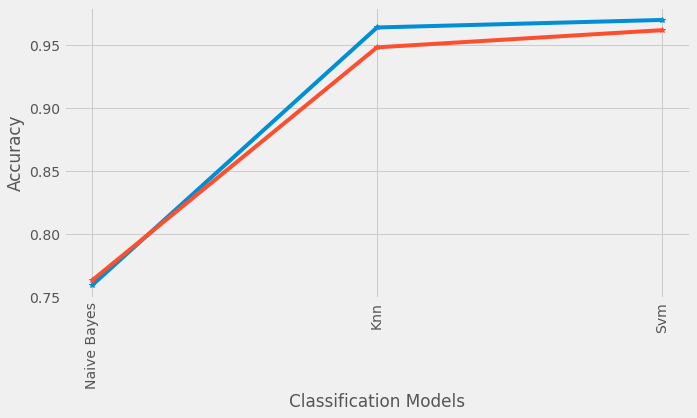

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
plt.plot(training_accuracy.keys(), training_accuracy.values(), marker = '*')
plt.plot(testing_accuracy.keys(), testing_accuracy.values(), marker = '*')
plt.xticks( rotation = 90)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.savefig('Comparison.jpg', bbox_inches='tight')
plt.show()


In [49]:
import joblib
joblib.dump(svm_pipeline, 'svm_spam_filter.pkl')

['svm_spam_filter.pkl']